#                                  House Price Prediction

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import array 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df_train=pd.read_csv('F:/learning/kaggle/house-prices-advanced-regression-techniques/train.csv')
df_test=pd.read_csv('F:/learning/kaggle/house-prices-advanced-regression-techniques/test.csv')

# EDA

## Variable Identification

Here  we identify the datatypes of each and every features, so that it will be useful for selecting a technique of uni/bivariate analysis

Data types of all features of training data has been stored in a list

In [3]:
# for train data
train_list_feature=list(df_train.dtypes)
train_list_featuretype=[]
for i in range(len(train_list_feature)):
    train_list_featuretype.append(str(train_list_feature[i]))

Data types of all features of testing data has been stored in a list

In [4]:
# for test data
test_list_feature=list(df_test.dtypes)
test_list_featuretype=[]
for i in range(len(test_list_feature)):
    test_list_featuretype.append(str(test_list_feature[i]))

Seperating numerical and categorical variable in training data superficially

In [5]:
# Sepertaing numerical and categorical variable
train_numerical_feature=[]
train_categorical_feature=[]
for i in range(len(train_list_featuretype)):
    if(train_list_featuretype[i]=='object'):
        train_categorical_feature.append(df_train.columns[i])
    else:
        train_numerical_feature.append(df_train.columns[i])
print(len(train_numerical_feature))
print(len(train_categorical_feature))

38
43


In [6]:
df_train[train_numerical_feature].columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [7]:
for i in range(len(train_numerical_feature)):
    print('{}: {}'.format(train_numerical_feature[i],len(df_train[train_numerical_feature[i]].unique())))

Id: 1460
MSSubClass: 15
LotFrontage: 111
LotArea: 1073
OverallQual: 10
OverallCond: 9
YearBuilt: 112
YearRemodAdd: 61
MasVnrArea: 328
BsmtFinSF1: 637
BsmtFinSF2: 144
BsmtUnfSF: 780
TotalBsmtSF: 721
1stFlrSF: 753
2ndFlrSF: 417
LowQualFinSF: 24
GrLivArea: 861
BsmtFullBath: 4
BsmtHalfBath: 3
FullBath: 4
HalfBath: 3
BedroomAbvGr: 8
KitchenAbvGr: 4
TotRmsAbvGrd: 12
Fireplaces: 4
GarageYrBlt: 98
GarageCars: 5
GarageArea: 441
WoodDeckSF: 274
OpenPorchSF: 202
EnclosedPorch: 120
3SsnPorch: 20
ScreenPorch: 76
PoolArea: 8
MiscVal: 21
MoSold: 12
YrSold: 5
SalePrice: 663


Now lets transfer the variables which are numerical but it has only few distinct values to categorical feature

In [8]:
train_categorical_feature1=train_categorical_feature.copy()
train_numerical_feature1=train_numerical_feature.copy()

We use the threshold of 5 distinct values. If the variable has 5 distinct values or less we will transfer it to categorical feature

In [9]:
for i in range(len(train_numerical_feature)):
    if(len(df_train[train_numerical_feature[i]].unique())<=5):
        train_categorical_feature1.append(train_numerical_feature[i])
        train_numerical_feature1.remove(train_numerical_feature[i])

In [10]:
for i in range(len(train_numerical_feature1)):
    print('{}: {}'.format(train_numerical_feature1[i],len(df_train[train_numerical_feature1[i]].unique())))

Id: 1460
MSSubClass: 15
LotFrontage: 111
LotArea: 1073
OverallQual: 10
OverallCond: 9
YearBuilt: 112
YearRemodAdd: 61
MasVnrArea: 328
BsmtFinSF1: 637
BsmtFinSF2: 144
BsmtUnfSF: 780
TotalBsmtSF: 721
1stFlrSF: 753
2ndFlrSF: 417
LowQualFinSF: 24
GrLivArea: 861
BedroomAbvGr: 8
TotRmsAbvGrd: 12
GarageYrBlt: 98
GarageArea: 441
WoodDeckSF: 274
OpenPorchSF: 202
EnclosedPorch: 120
3SsnPorch: 20
ScreenPorch: 76
PoolArea: 8
MiscVal: 21
MoSold: 12
SalePrice: 663


No need to seperate numerical and categorical variables for test data as the test data also have the same split of variables as training data. But still the train_numerical_feature has SalePrice, so we remove it as it is a tartget variable and then we copy it to test_numerical_variable

In [11]:
try:
    train_numerical_feature1.remove('SalePrice')
    test_numerical_feature1=train_numerical_feature1.copy()
except:
    test_numerical_feature1=train_numerical_feature1.copy()

In [12]:
test_categorical_feature1=train_categorical_feature1.copy()

Understand the number of NaN in our training data

In [13]:
df_train[train_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BedroomAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
GarageYrBlt      1379 non-null float64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64

Understand the number of NaN in our test data

In [14]:
df_test[test_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1444 non-null float64
BsmtFinSF1       1458 non-null float64
BsmtFinSF2       1458 non-null float64
BsmtUnfSF        1458 non-null float64
TotalBsmtSF      1458 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BedroomAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-null int64
GarageYrBlt      1381 non-null float64
GarageArea       1458 non-null float64
WoodDeckSF       1459 non-null int64
OpenPorchSF      1459 non-null int64
EnclosedPorch    1459 non-

In [15]:
# print(df_train['SalePrice'].isna().any())

## Univariate Analysis of Train data

For numerical values

We can't analysis for the feature with atleast one NaN, so analyze only the feature without NaN. 

<IPython.core.display.Javascript object>


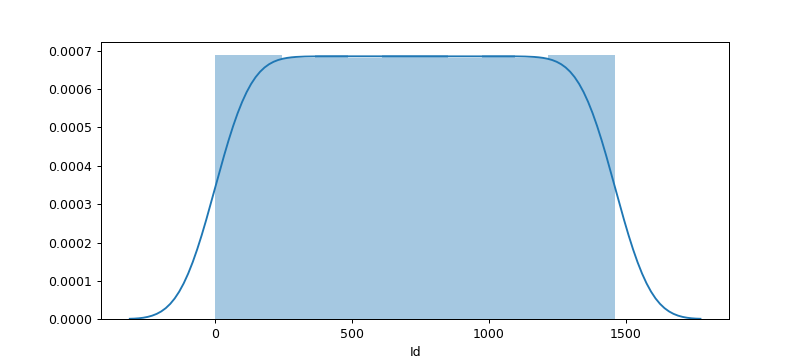

<IPython.core.display.Javascript object>


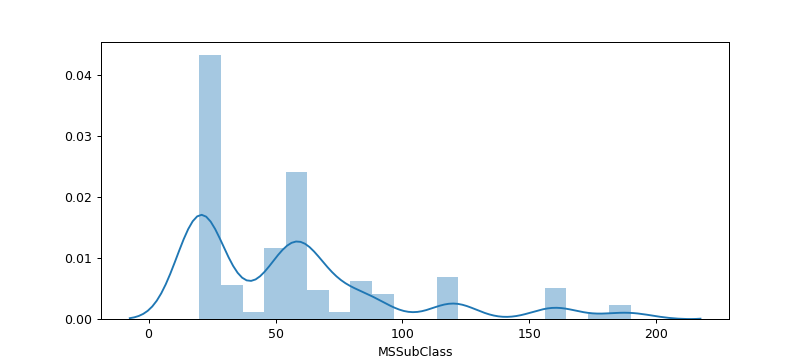

<IPython.core.display.Javascript object>


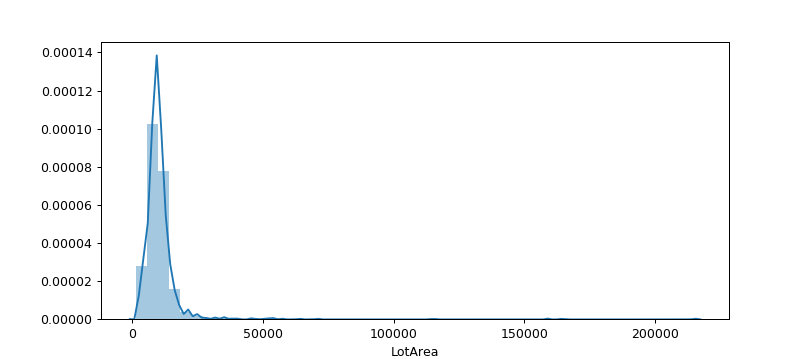

<IPython.core.display.Javascript object>


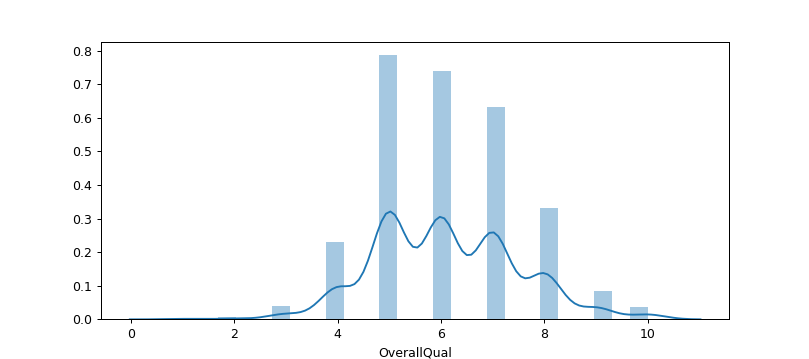

<IPython.core.display.Javascript object>


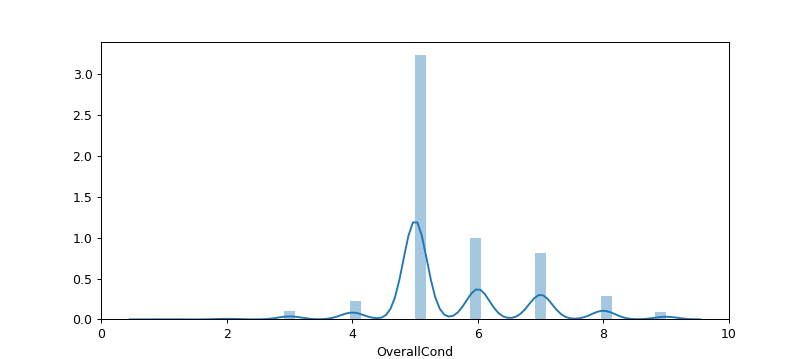

<IPython.core.display.Javascript object>


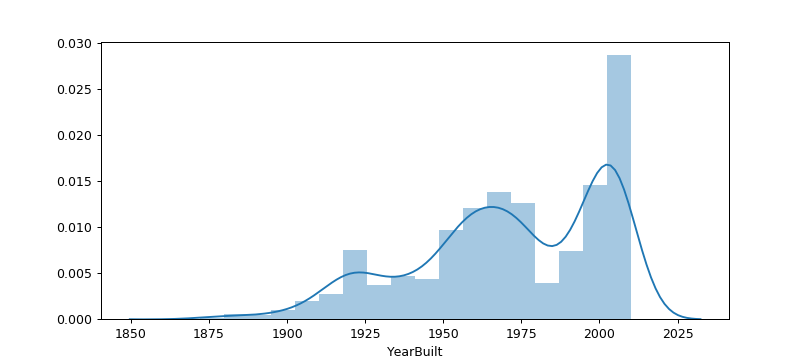

<IPython.core.display.Javascript object>


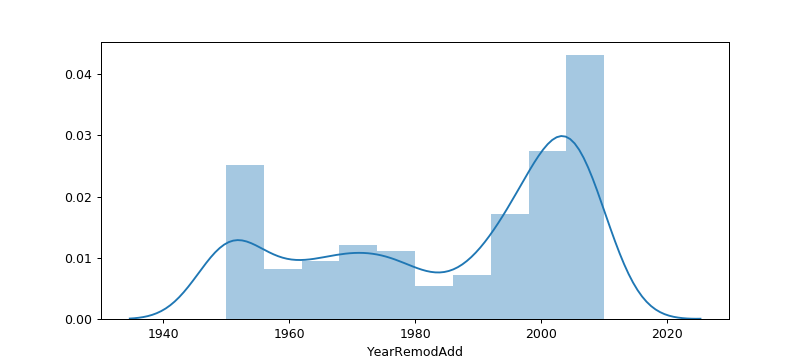

<IPython.core.display.Javascript object>


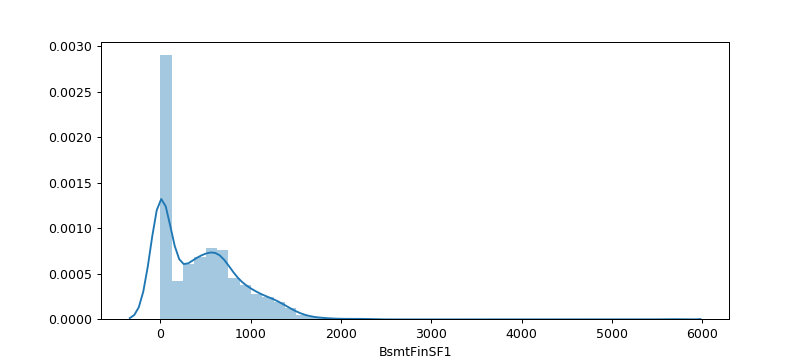

<IPython.core.display.Javascript object>


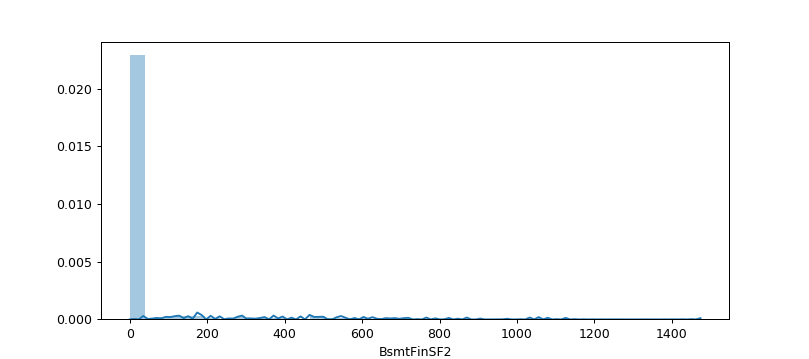

<IPython.core.display.Javascript object>


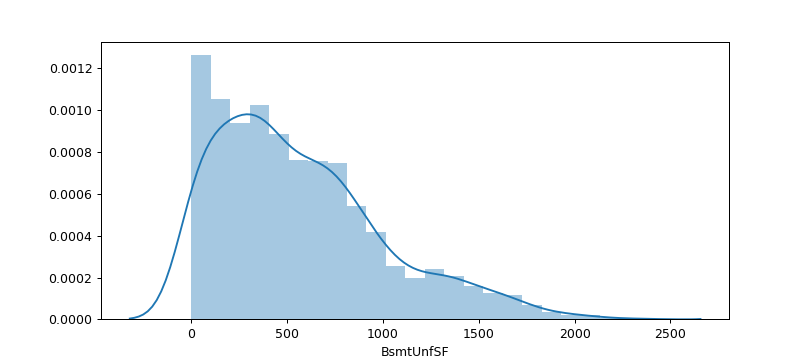

<IPython.core.display.Javascript object>


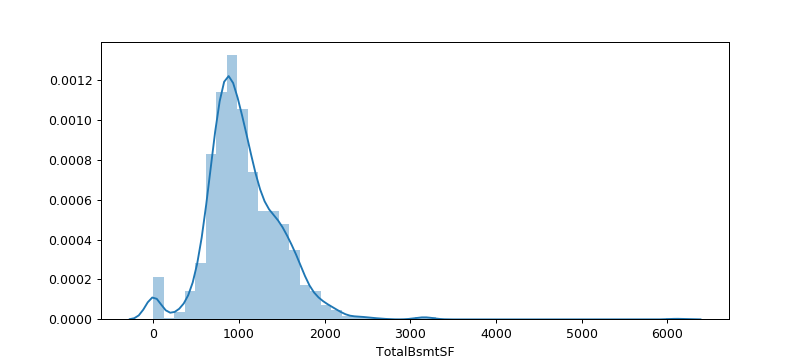

<IPython.core.display.Javascript object>


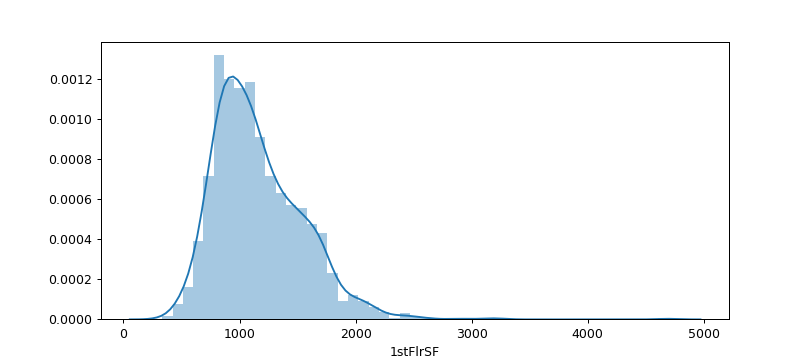

<IPython.core.display.Javascript object>


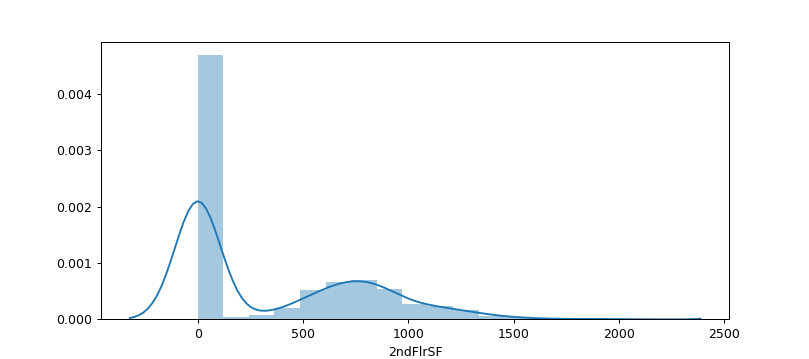

<IPython.core.display.Javascript object>


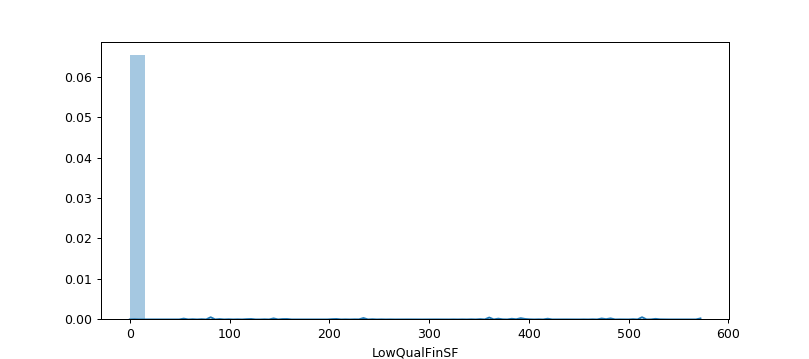

<IPython.core.display.Javascript object>


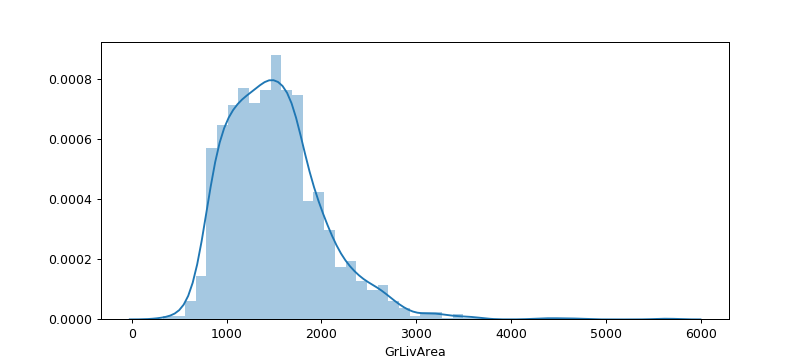

<IPython.core.display.Javascript object>


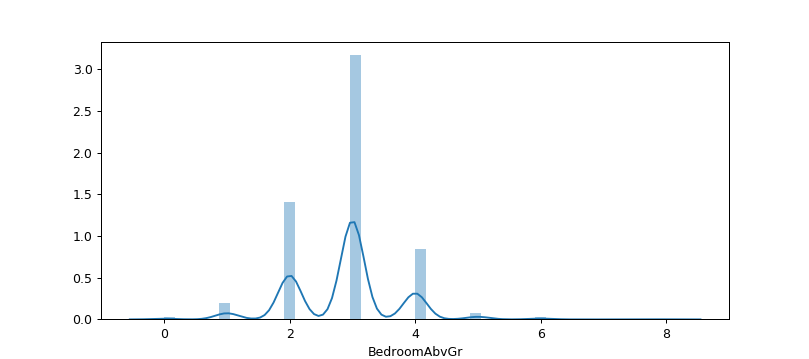

<IPython.core.display.Javascript object>


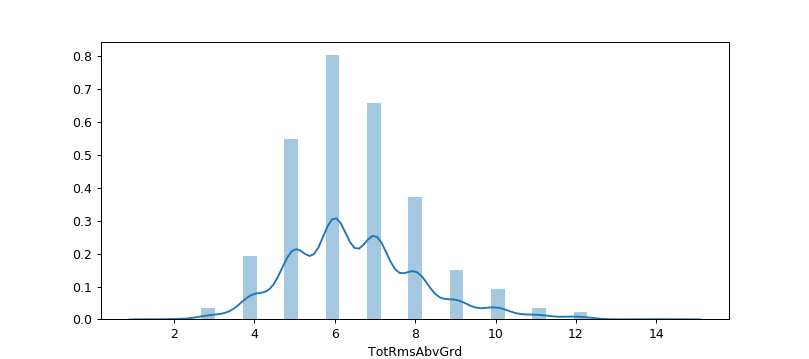

<IPython.core.display.Javascript object>


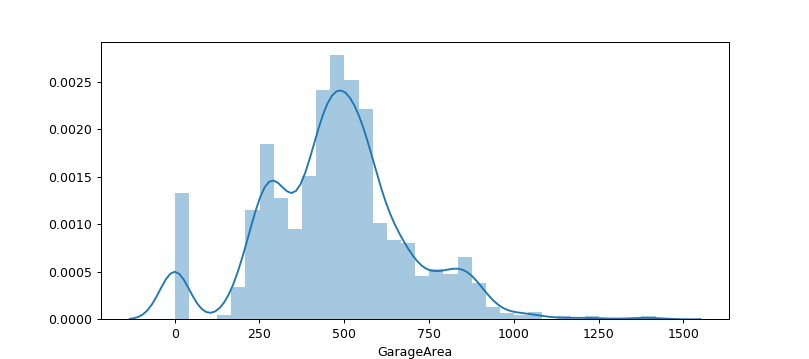

<IPython.core.display.Javascript object>


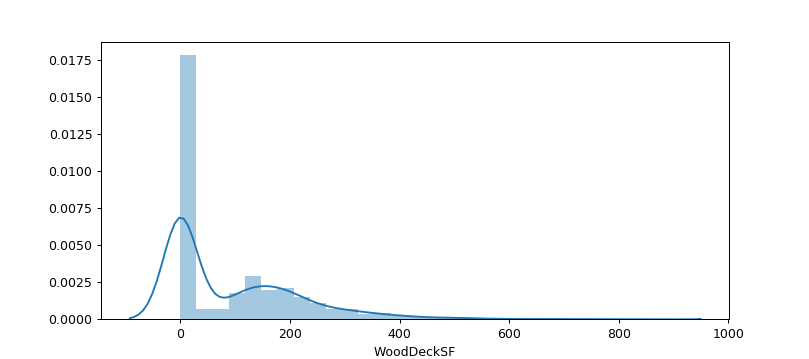

<IPython.core.display.Javascript object>


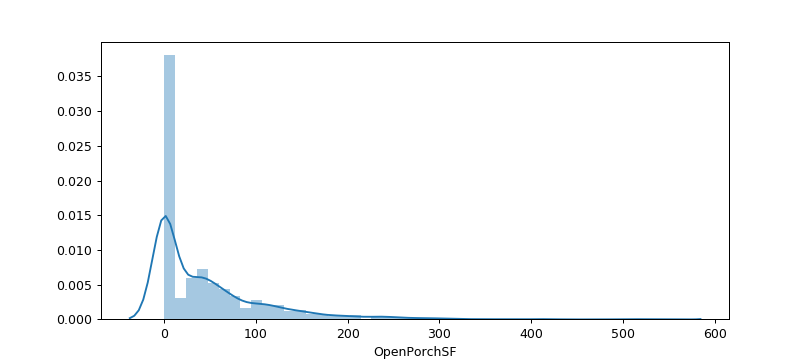

C:\Users\vikrama\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


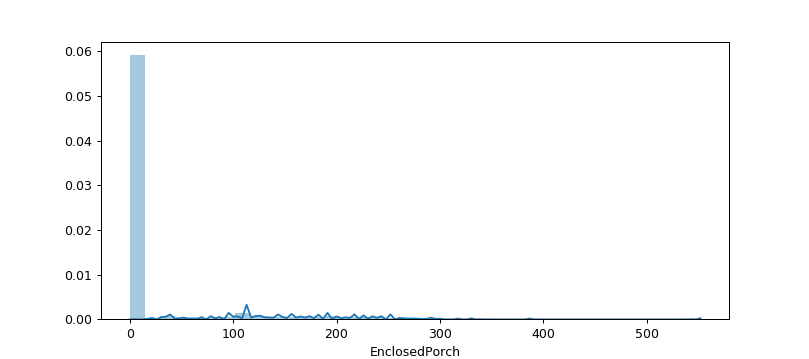

<IPython.core.display.Javascript object>


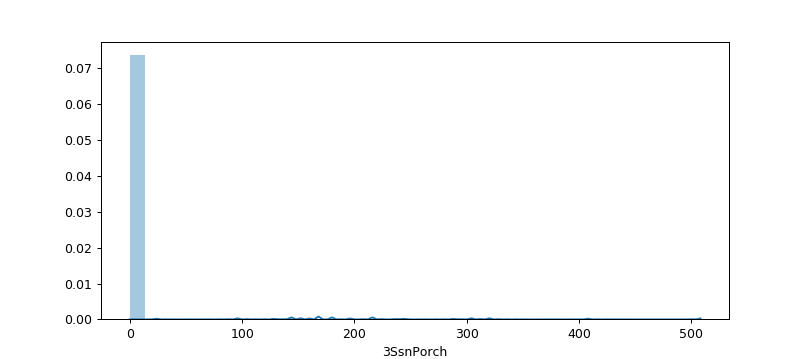

<IPython.core.display.Javascript object>


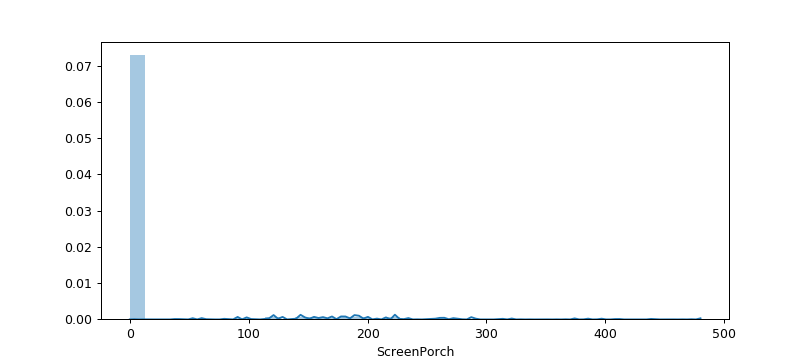

<IPython.core.display.Javascript object>


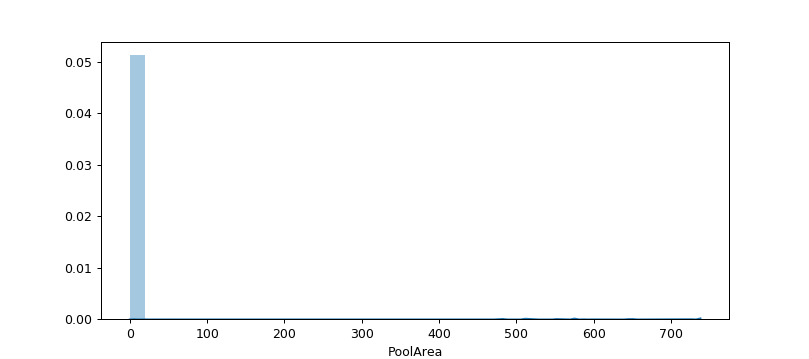

<IPython.core.display.Javascript object>


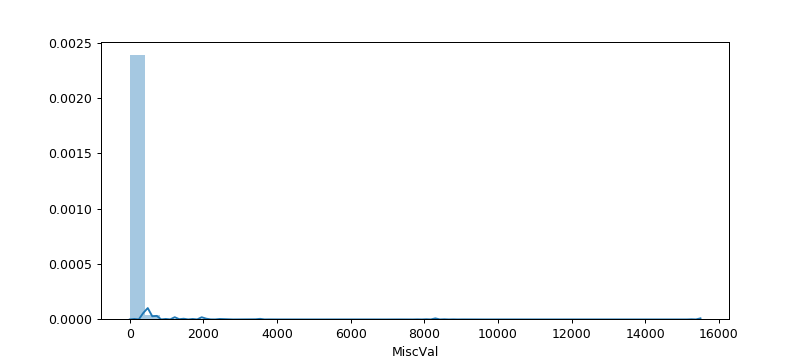

<IPython.core.display.Javascript object>


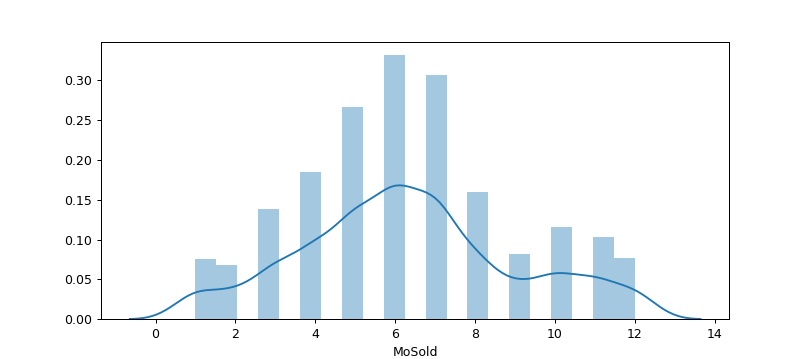

In [16]:
for i in range(len(train_numerical_feature1)):
    if(df_train[train_numerical_feature1[i]].isna().any()==False):
        plt.figure(figsize=(9, 4))
        ax = sns.distplot(df_train[train_numerical_feature1[i]])
        plt.show()
    else:
        pass

For categorical Variable

In [17]:
df_train[train_categorical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

MSZoning


C:\Users\vikrama\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


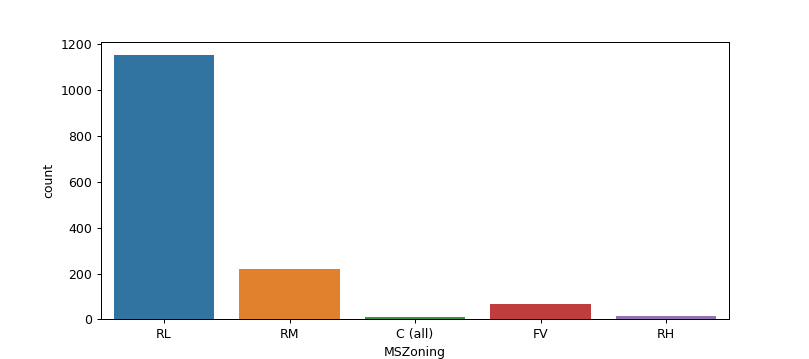

Street


<IPython.core.display.Javascript object>


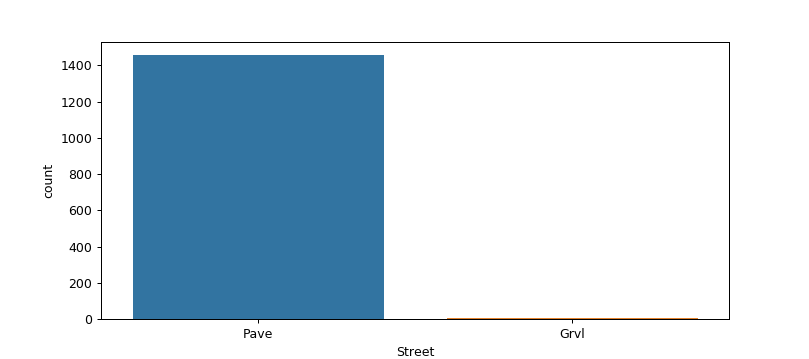

LotShape


<IPython.core.display.Javascript object>


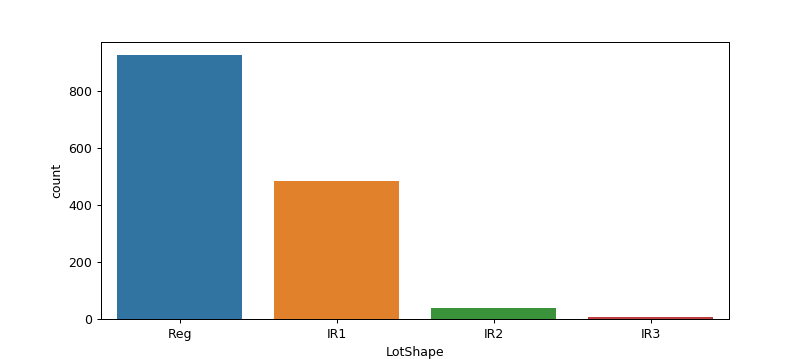

LandContour


<IPython.core.display.Javascript object>


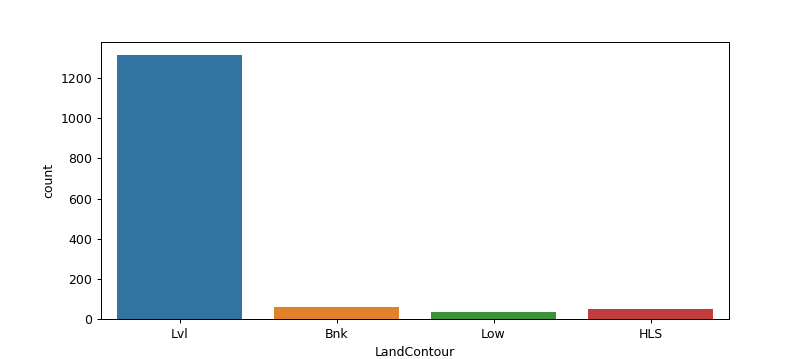

Utilities


<IPython.core.display.Javascript object>


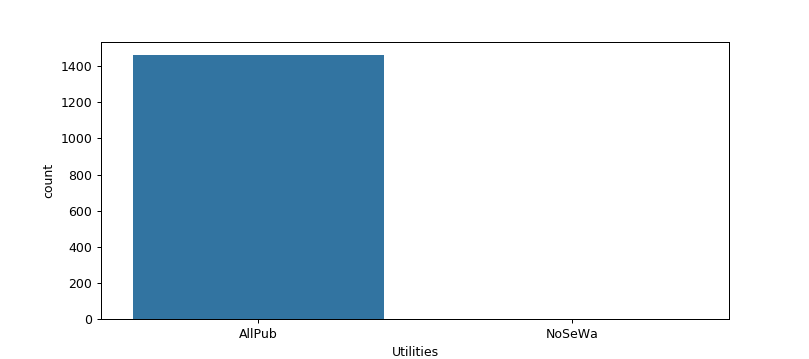

LotConfig


<IPython.core.display.Javascript object>


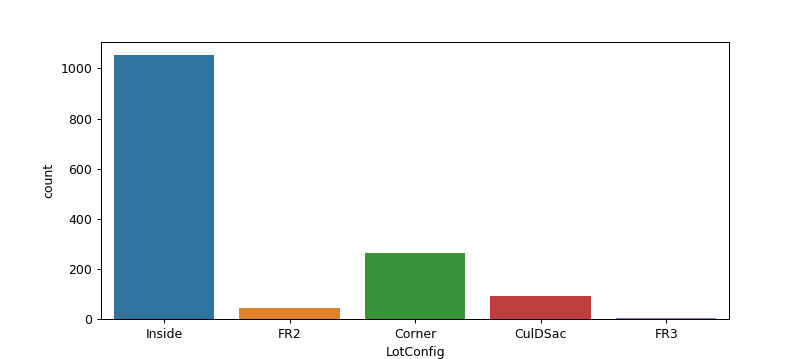

LandSlope


<IPython.core.display.Javascript object>


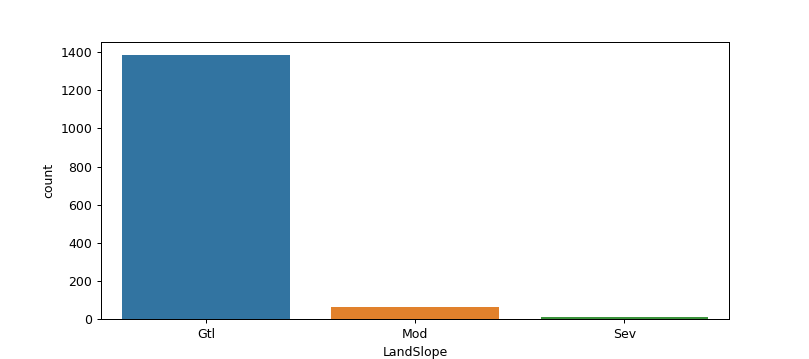

Neighborhood


<IPython.core.display.Javascript object>

Condition1


<IPython.core.display.Javascript object>

Condition2


<IPython.core.display.Javascript object>

BldgType


<IPython.core.display.Javascript object>


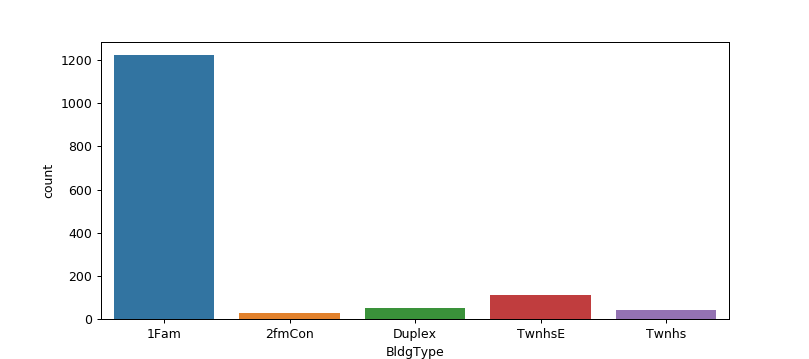

HouseStyle


<IPython.core.display.Javascript object>


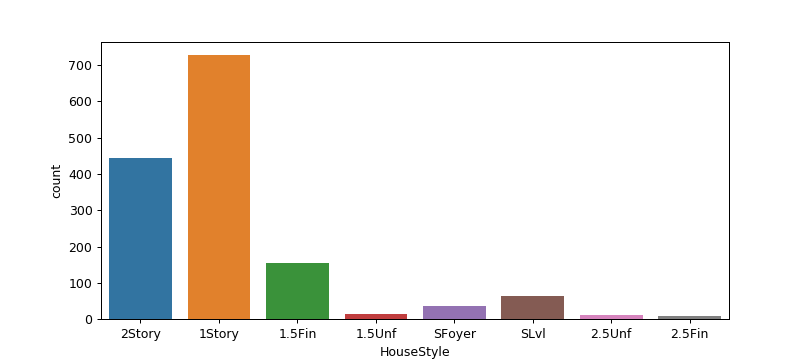

RoofStyle


<IPython.core.display.Javascript object>


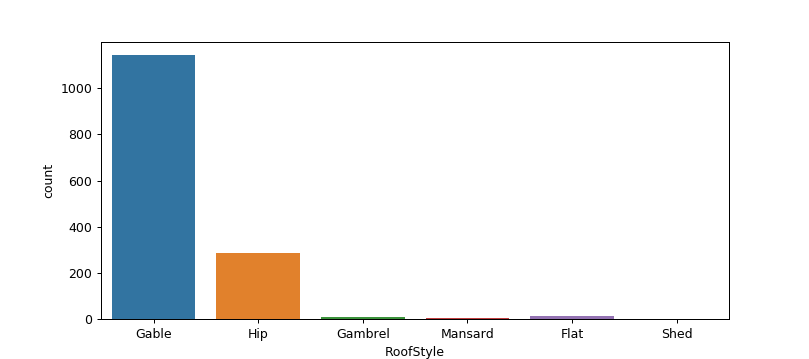

RoofMatl


<IPython.core.display.Javascript object>

Exterior1st


<IPython.core.display.Javascript object>

Exterior2nd


<IPython.core.display.Javascript object>


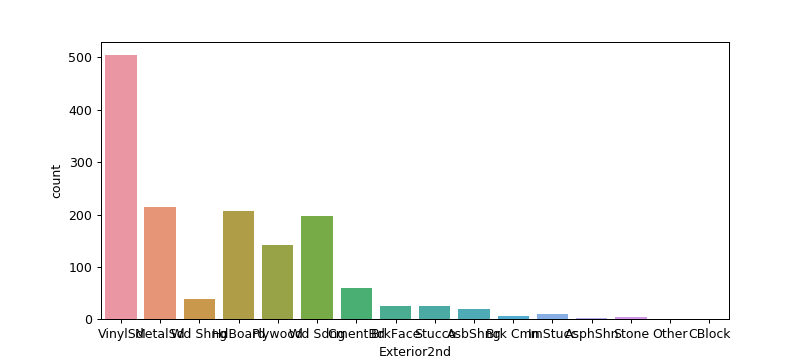

ExterQual


<IPython.core.display.Javascript object>


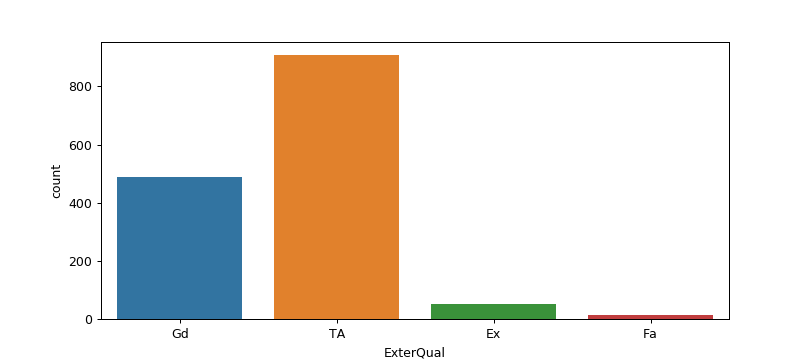

ExterCond


<IPython.core.display.Javascript object>


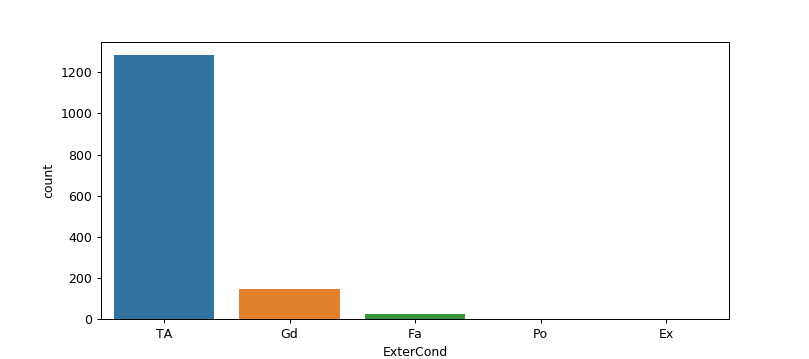

Foundation


<IPython.core.display.Javascript object>

Heating


<IPython.core.display.Javascript object>

HeatingQC


<IPython.core.display.Javascript object>

CentralAir


<IPython.core.display.Javascript object>


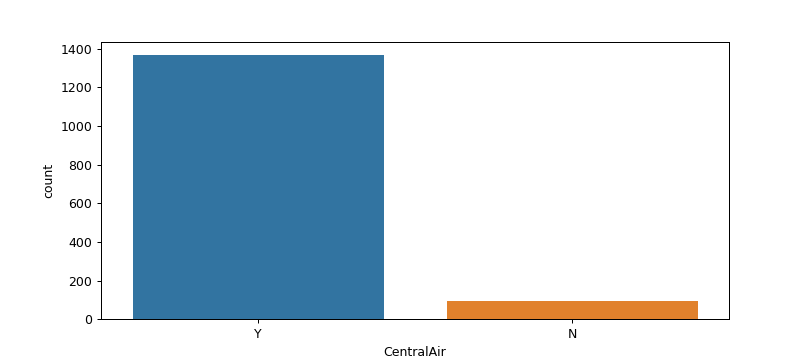

KitchenQual


<IPython.core.display.Javascript object>


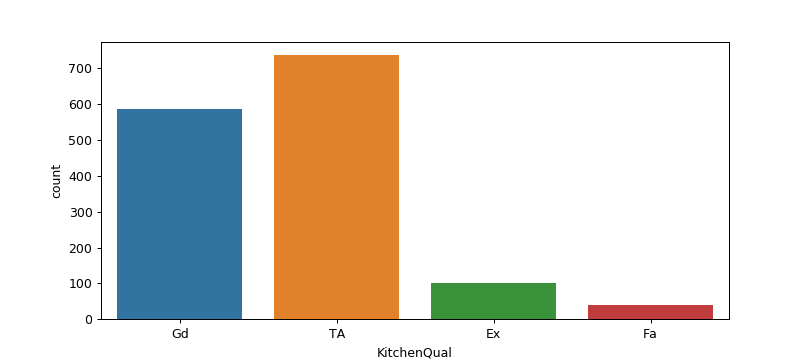

Functional


<IPython.core.display.Javascript object>


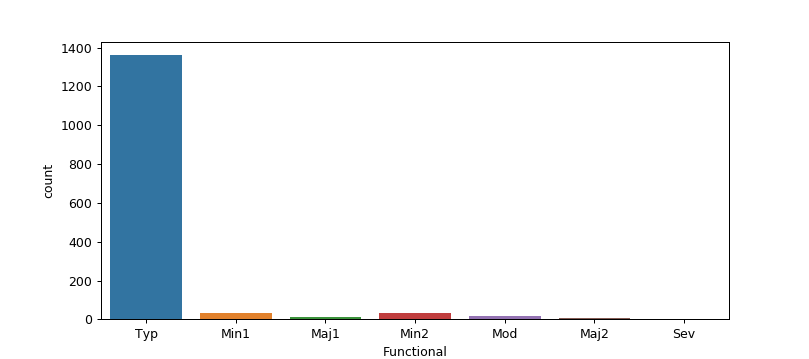

PavedDrive


<IPython.core.display.Javascript object>


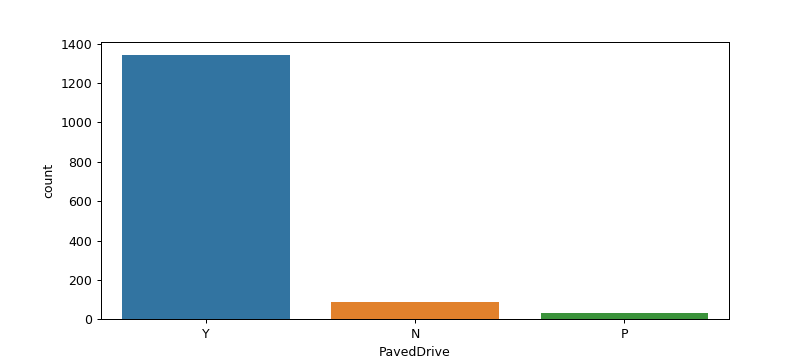

SaleType


<IPython.core.display.Javascript object>

SaleCondition


<IPython.core.display.Javascript object>

BsmtFullBath


<IPython.core.display.Javascript object>

BsmtHalfBath


<IPython.core.display.Javascript object>


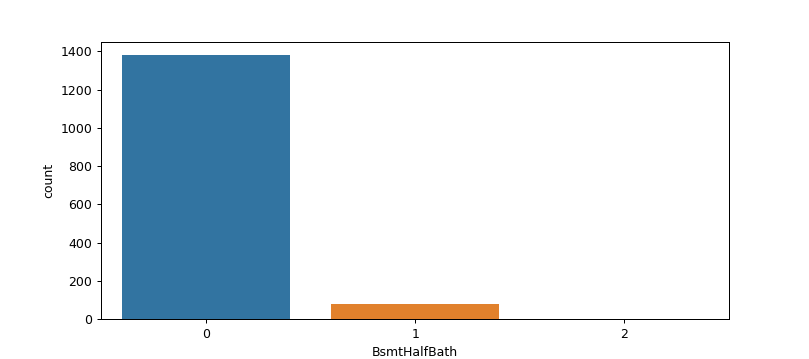

FullBath


<IPython.core.display.Javascript object>


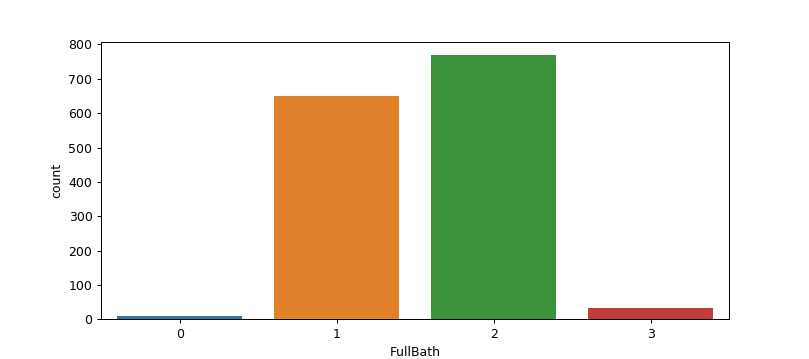

HalfBath


<IPython.core.display.Javascript object>


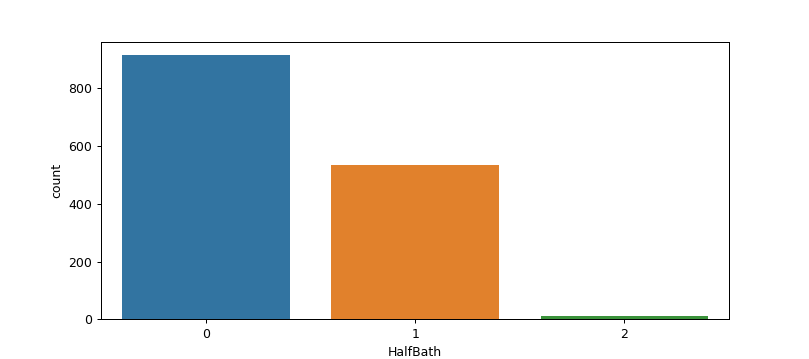

KitchenAbvGr


<IPython.core.display.Javascript object>


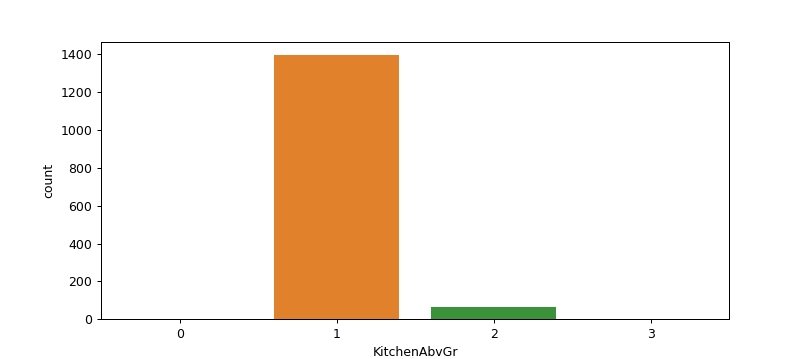

Fireplaces


<IPython.core.display.Javascript object>


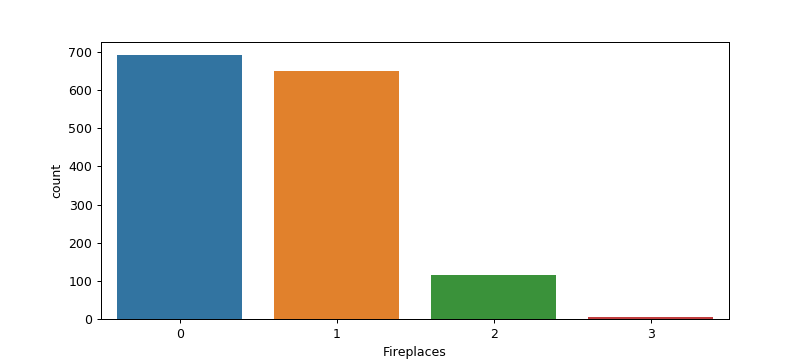

GarageCars


<IPython.core.display.Javascript object>


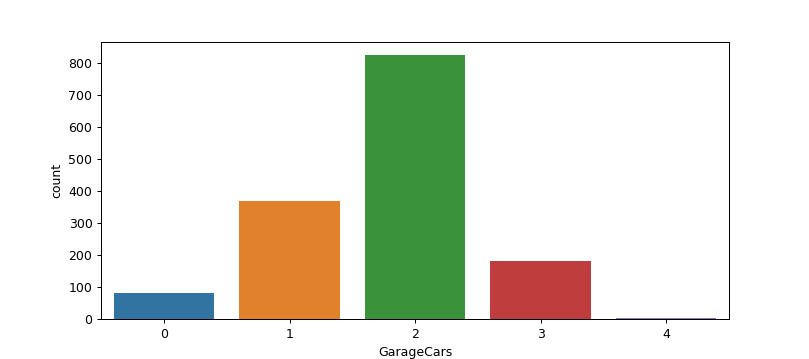

YrSold


<IPython.core.display.Javascript object>


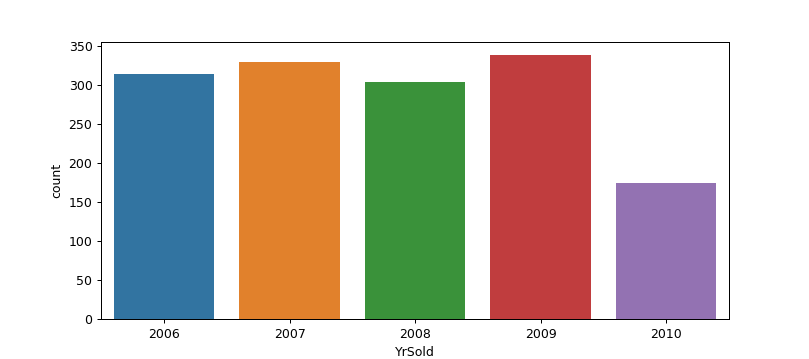

In [18]:
for i in range(len(train_categorical_feature1)):
    if(df_train[train_categorical_feature1[i]].isna().any()==False):
        print(train_categorical_feature1[i])
        plt.figure(figsize=(9, 4))
        ax = sns.countplot(df_train[train_categorical_feature1[i]])
#     label_values(ax)
        plt.show()
    else:
        pass

## Bivariate Analysis

C:\Users\vikrama\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


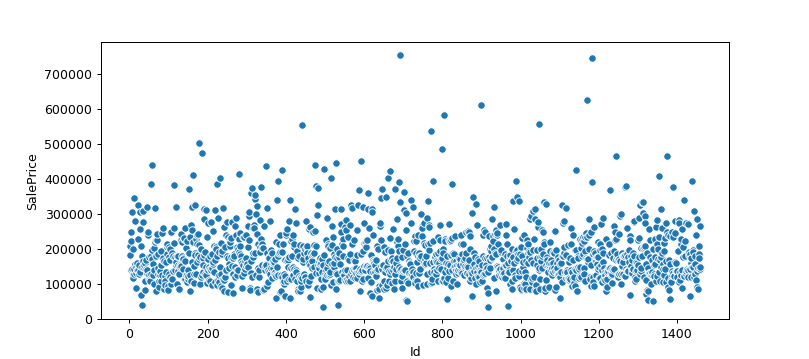

<IPython.core.display.Javascript object>


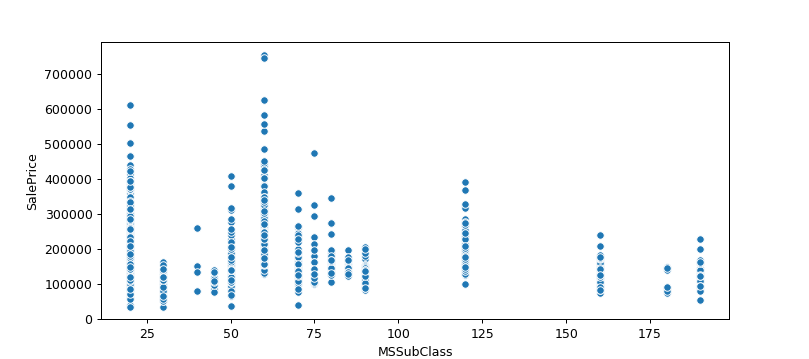

<IPython.core.display.Javascript object>


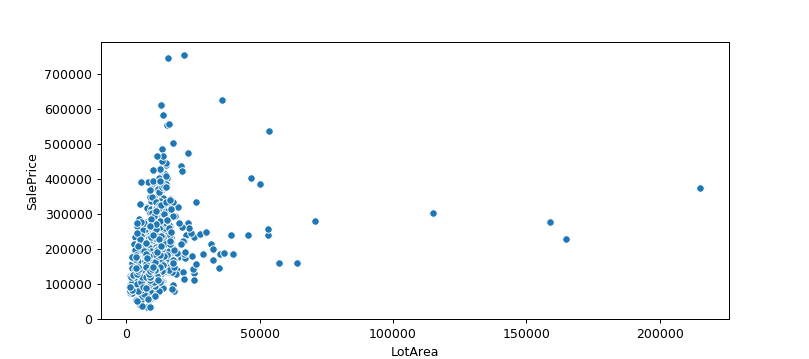

<IPython.core.display.Javascript object>


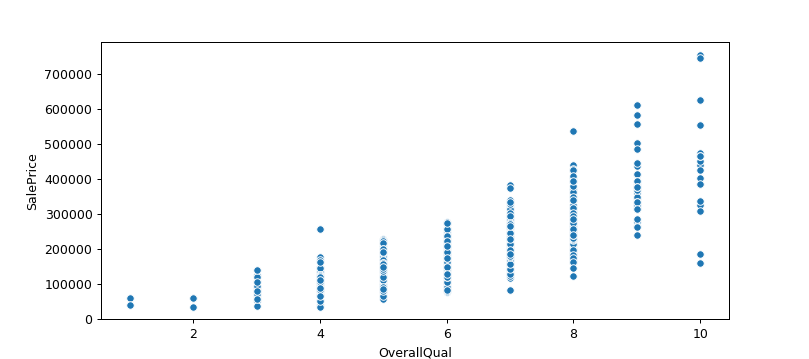

<IPython.core.display.Javascript object>


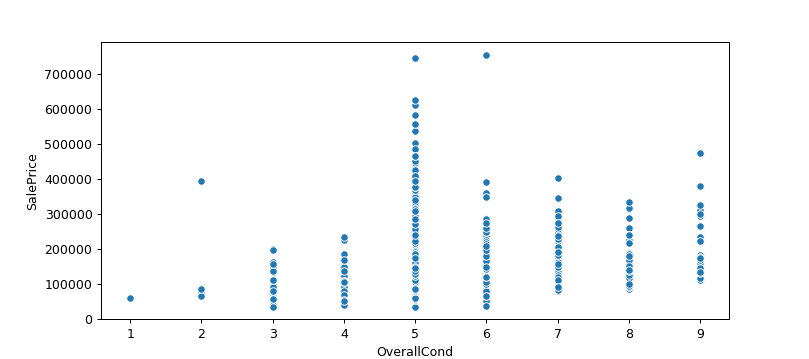

<IPython.core.display.Javascript object>


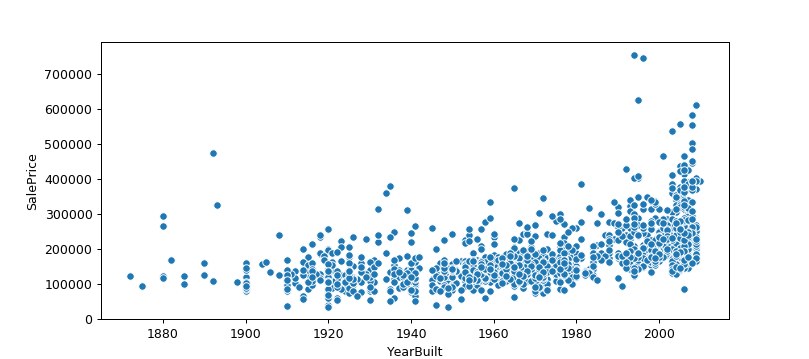

<IPython.core.display.Javascript object>


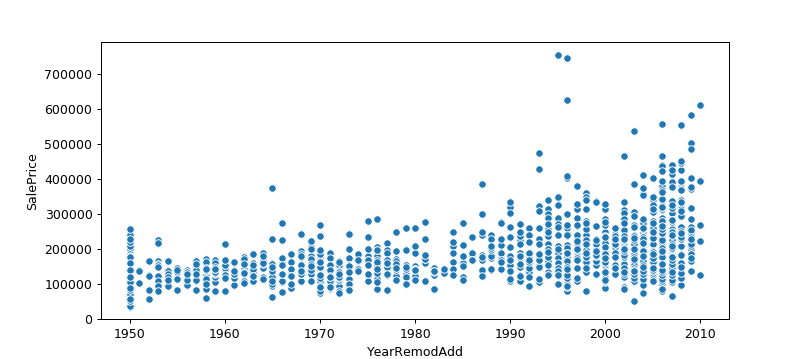

<IPython.core.display.Javascript object>


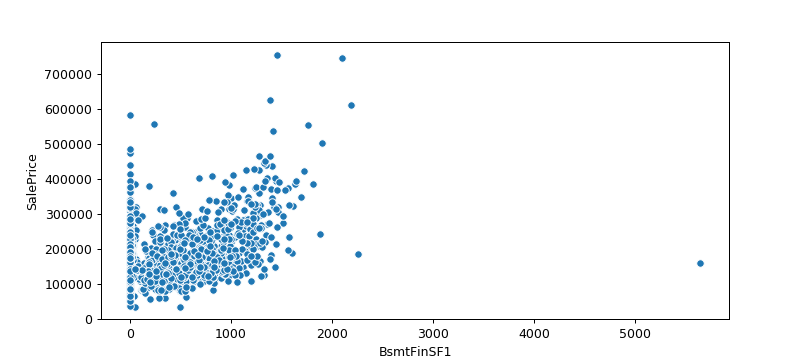

<IPython.core.display.Javascript object>


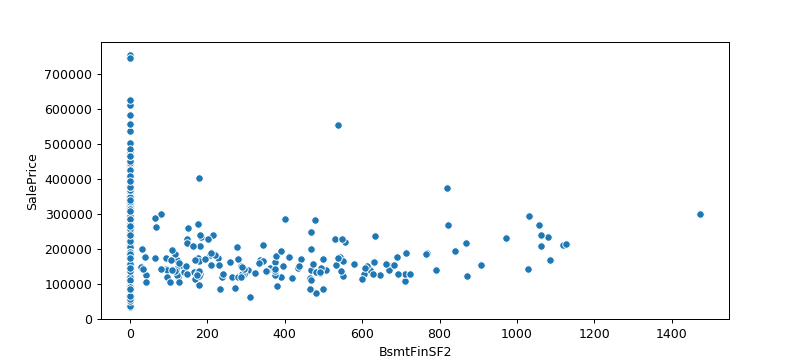

<IPython.core.display.Javascript object>


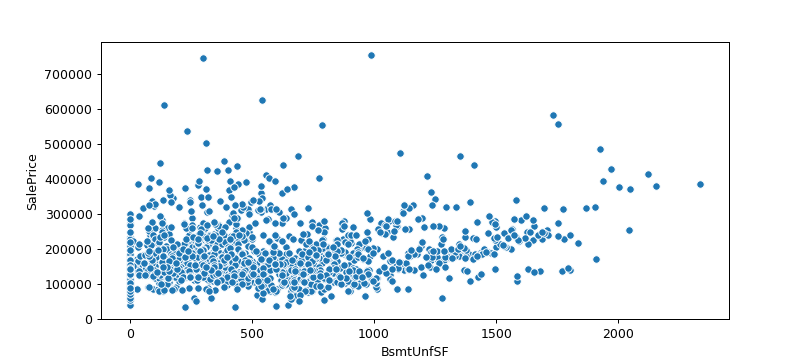

<IPython.core.display.Javascript object>


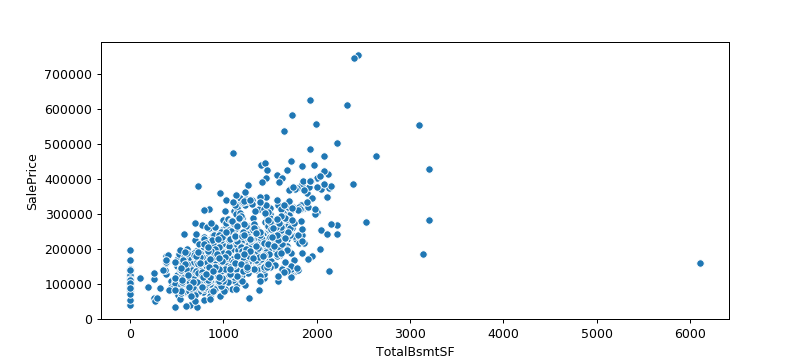

<IPython.core.display.Javascript object>


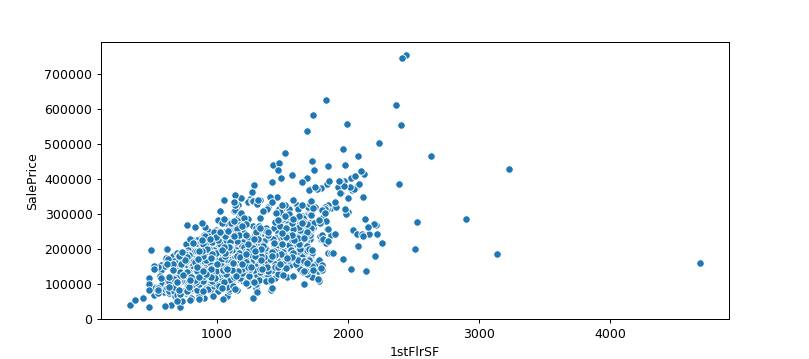

<IPython.core.display.Javascript object>


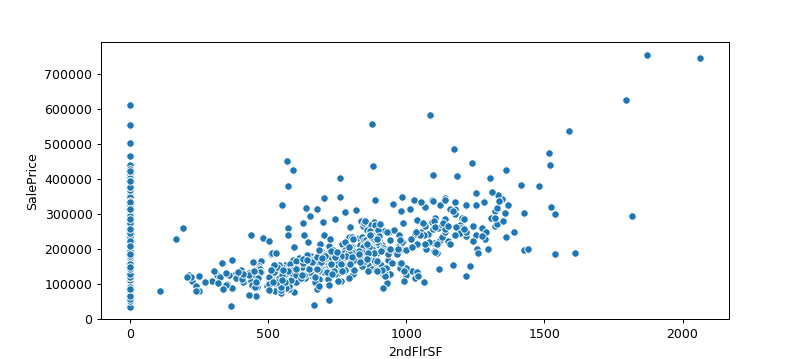

<IPython.core.display.Javascript object>


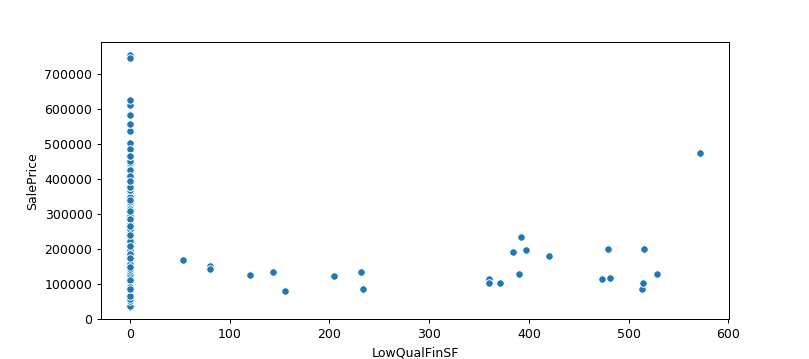

<IPython.core.display.Javascript object>


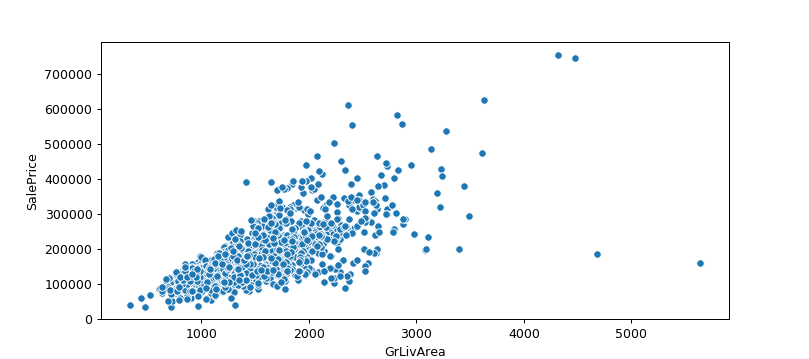

<IPython.core.display.Javascript object>


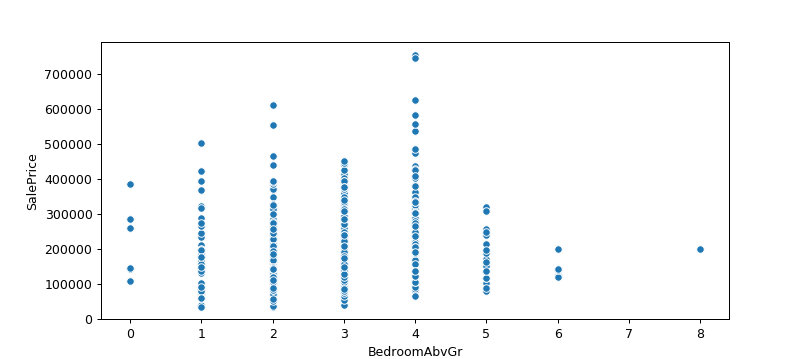

<IPython.core.display.Javascript object>


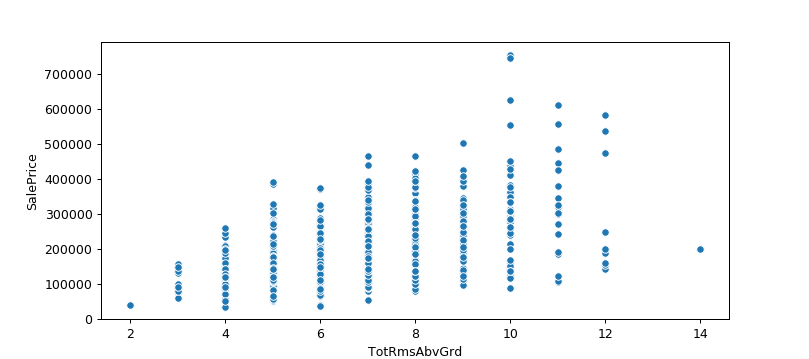

<IPython.core.display.Javascript object>


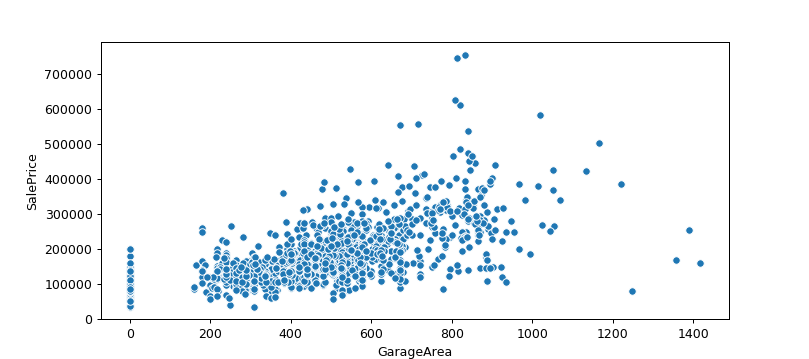

<IPython.core.display.Javascript object>


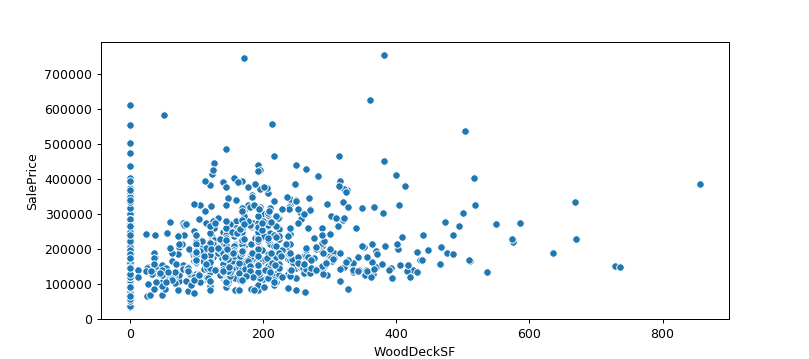

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


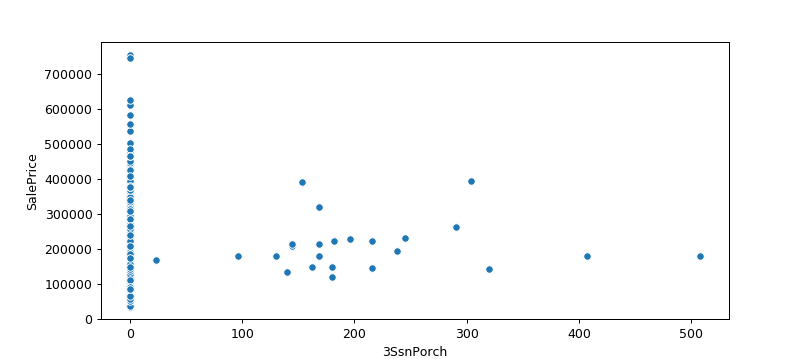

<IPython.core.display.Javascript object>


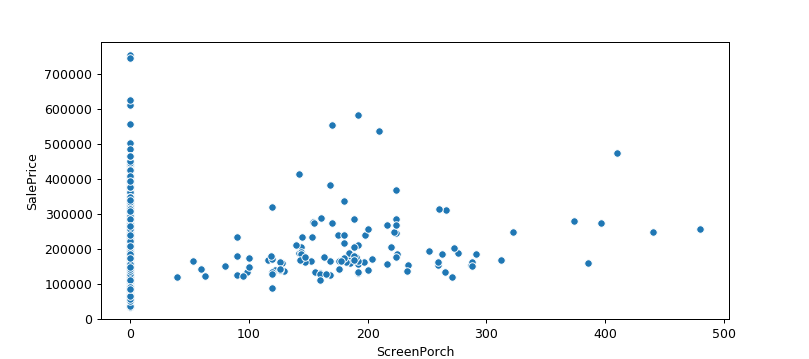

<IPython.core.display.Javascript object>


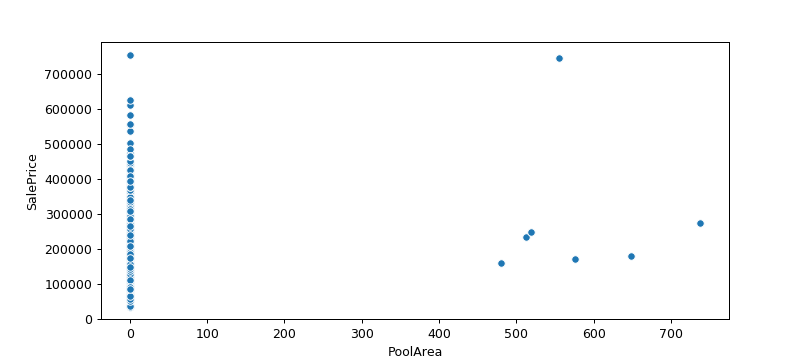

<IPython.core.display.Javascript object>


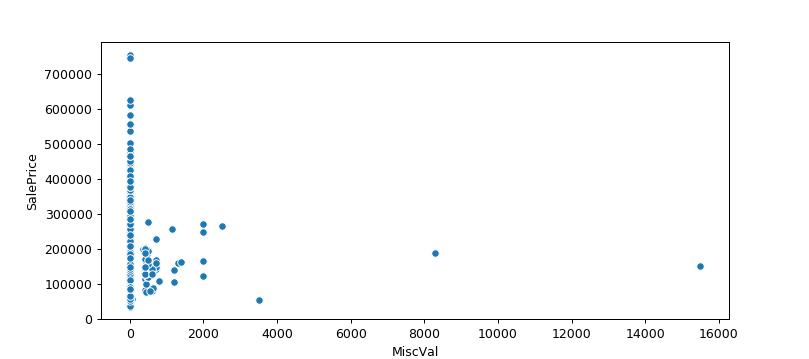

<IPython.core.display.Javascript object>


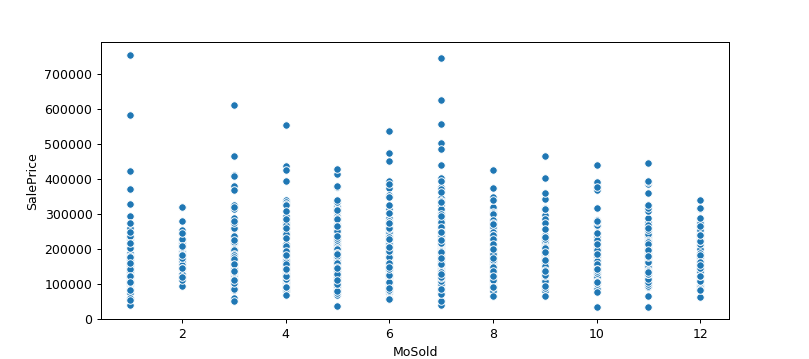

In [19]:
for i in range(len(train_numerical_feature1)):
    if(df_train[train_numerical_feature1[i]].isna().any()==False):
        plt.figure(figsize=(9, 4))
        ax = sns.scatterplot(x=df_train[train_numerical_feature1[i]],y=df_train['SalePrice'])
        plt.show()
    else:
        pass

## Missing Value Treatment

We will simultabeously treat missing values for train and test data 

First training data

In [20]:
df_train[train_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BedroomAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
GarageYrBlt      1379 non-null float64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64

In [21]:
train_with_nan_numerical=['LotFrontage','MasVnrArea','GarageYrBlt']

We are filling the missing values in 'LotFrontage' with the mean value

In [22]:
df_train[train_with_nan_numerical[0]]=df_train[train_with_nan_numerical[0]].fillna(df_train[train_with_nan_numerical[0]].mean())

We are filling the missing values in 'MasVnrArea' with the mean value

In [23]:
df_train[train_with_nan_numerical[1]]=df_train[train_with_nan_numerical[1]].fillna(df_train[train_with_nan_numerical[1]].mean())

In [24]:
df_train[train_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BedroomAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
GarageYrBlt      1379 non-null float64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64

Dropping the GarageYrBlt feature

In [25]:
df_train=df_train.drop('GarageYrBlt',axis=1)

Also removing the GarageYrBlt from the list train_numerical_feature1

In [26]:
train_numerical_feature1.remove('GarageYrBlt')

For test data

In [27]:
df_test[test_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1444 non-null float64
BsmtFinSF1       1458 non-null float64
BsmtFinSF2       1458 non-null float64
BsmtUnfSF        1458 non-null float64
TotalBsmtSF      1458 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BedroomAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-null int64
GarageYrBlt      1381 non-null float64
GarageArea       1458 non-null float64
WoodDeckSF       1459 non-null int64
OpenPorchSF      1459 non-null int64
EnclosedPorch    1459 non-

Lets fill the missing value in LotFrontage feature through mean

In [28]:
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

In [29]:
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinSF2']=df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['GarageArea']=df_test['GarageArea'].fillna(df_test['GarageArea'].mean())

In [30]:
df_test[test_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1459 non-null float64
BsmtFinSF1       1459 non-null float64
BsmtFinSF2       1459 non-null float64
BsmtUnfSF        1459 non-null float64
TotalBsmtSF      1459 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BedroomAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-null int64
GarageYrBlt      1381 non-null float64
GarageArea       1459 non-null float64
WoodDeckSF       1459 non-null int64
OpenPorchSF      1459 non-null int64
EnclosedPorch    1459 non-

Dropping GarageYrBlt feature

In [31]:
df_test=df_test.drop('GarageYrBlt',axis=1)

In [33]:
try:
    test_numerical_feature1.remove('GarageYrBlt')
except:
    pass

In [34]:
df_test[test_numerical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 28 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1459 non-null float64
BsmtFinSF1       1459 non-null float64
BsmtFinSF2       1459 non-null float64
BsmtUnfSF        1459 non-null float64
TotalBsmtSF      1459 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BedroomAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-null int64
GarageArea       1459 non-null float64
WoodDeckSF       1459 non-null int64
OpenPorchSF      1459 non-null int64
EnclosedPorch    1459 non-null int64
3SsnPorch        1459 non-nu

Treating missing values in categorical variables

For training data

In [35]:
df_train[train_categorical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

I am simply deleting all these features as it has just say 100 records out of 1460.

In [36]:
df_train=df_train.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1)

In [37]:
del_feature=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu']
train_categorical_feature1=set(train_categorical_feature1)-set(del_feature)

In [38]:
df_train[train_categorical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
Exterior1st      1460 non-null object
LandSlope        1460 non-null object
KitchenQual      1460 non-null object
Condition1       1460 non-null object
BsmtQual         1423 non-null object
Neighborhood     1460 non-null object
BsmtFinType1     1423 non-null object
MSZoning         1460 non-null object
Condition2       1460 non-null object
LotConfig        1460 non-null object
LotShape         1460 non-null object
Utilities        1460 non-null object
BsmtCond         1423 non-null object
BsmtFinType2     1422 non-null object
HouseStyle       1460 non-null object
GarageFinish     1379 non-null object
Fireplaces       1460 non-null int64
Heating          1460 non-null object
KitchenAbvGr     1460 non-null int64
GarageQual       1379 non-null object
HeatingQC        1460 non-null object
GarageCond       1379 non-null object
Foundation       1460 non-null object
HalfBath         1460

Filling the missing values with Mode

In [39]:
df_train['MasVnrType'].value_counts()
df_train['MasVnrType']=df_train['MasVnrType'].fillna('None')

In [40]:
print(df_train['Electrical'].value_counts())
df_train['Electrical']=df_train['Electrical'].fillna('SBrkr')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [41]:
print(df_train['BsmtFinType1'].value_counts())
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna('Unf')

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


In [42]:
print(df_train['BsmtQual'].value_counts())
df_train['BsmtQual']=df_train['BsmtQual'].fillna('TA')

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


In [43]:
print(df_train['BsmtCond'].value_counts())
df_train['BsmtCond']=df_train['BsmtCond'].fillna('TA')

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


In [44]:
print(df_train['BsmtExposure'].value_counts())
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna('No')

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


In [45]:
print(df_train['GarageFinish'].value_counts())
df_train['GarageFinish']=df_train['GarageFinish'].fillna('Unf')

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


In [46]:
print(df_train['GarageCond'].value_counts())
df_train['GarageCond']=df_train['GarageCond'].fillna('TA')

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [47]:
print(df_train['GarageType'].value_counts())
df_train['GarageType']=df_train['GarageType'].fillna('Attchd')

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


In [48]:
print(df_train['BsmtFinType2'].value_counts())
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna('Unf')

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [49]:
print(df_train['GarageQual'].value_counts())
df_train['GarageQual']=df_train['GarageQual'].fillna('TA')

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


In [50]:
df_train[train_categorical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
Exterior1st      1460 non-null object
LandSlope        1460 non-null object
KitchenQual      1460 non-null object
Condition1       1460 non-null object
BsmtQual         1460 non-null object
Neighborhood     1460 non-null object
BsmtFinType1     1460 non-null object
MSZoning         1460 non-null object
Condition2       1460 non-null object
LotConfig        1460 non-null object
LotShape         1460 non-null object
Utilities        1460 non-null object
BsmtCond         1460 non-null object
BsmtFinType2     1460 non-null object
HouseStyle       1460 non-null object
GarageFinish     1460 non-null object
Fireplaces       1460 non-null int64
Heating          1460 non-null object
KitchenAbvGr     1460 non-null int64
GarageQual       1460 non-null object
HeatingQC        1460 non-null object
GarageCond       1460 non-null object
Foundation       1460 non-null object
HalfBath         1460

For test data

In [51]:
df_test[test_categorical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 51 columns):
MSZoning         1455 non-null object
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1443 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1415 non-null object
BsmtCond         1414 non-null object
BsmtExposure     141

Even here we fill the missing value with mode

In [52]:
df_test=df_test.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1)

In [53]:
df_test[train_categorical_feature1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 46 columns):
Exterior1st      1458 non-null object
LandSlope        1459 non-null object
KitchenQual      1458 non-null object
Condition1       1459 non-null object
BsmtQual         1415 non-null object
Neighborhood     1459 non-null object
BsmtFinType1     1417 non-null object
MSZoning         1455 non-null object
Condition2       1459 non-null object
LotConfig        1459 non-null object
LotShape         1459 non-null object
Utilities        1457 non-null object
BsmtCond         1414 non-null object
BsmtFinType2     1417 non-null object
HouseStyle       1459 non-null object
GarageFinish     1381 non-null object
Fireplaces       1459 non-null int64
Heating          1459 non-null object
KitchenAbvGr     1459 non-null int64
GarageQual       1381 non-null object
HeatingQC        1459 non-null object
GarageCond       1381 non-null object
Foundation       1459 non-null object
HalfBath         1459

In [54]:
print(df_test['Exterior2nd'].value_counts())
df_test['Exterior2nd']=df_train['Exterior2nd'].fillna('VinylSd')

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64


In [55]:
print(df_test['Exterior1st'].value_counts())
df_test['Exterior1st']=df_train['Exterior1st'].fillna('VinylSd')

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64


In [56]:
print(df_test['GarageType'].value_counts())
df_test['GarageType']=df_train['GarageType'].fillna('Attchd')

Attchd     853
Detchd     392
BuiltIn     98
2Types      17
Basment     17
CarPort      6
Name: GarageType, dtype: int64


In [57]:
print(df_test['BsmtFinType2'].value_counts())
df_test['BsmtFinType2']=df_train['BsmtFinType2'].fillna('Unf')

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64


In [58]:
print(df_test['GarageCars'].value_counts())
df_test['GarageCars']=df_train['GarageCars'].fillna(2)

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64


In [59]:
print(df_test['BsmtCond'].value_counts())
df_test['BsmtCond']=df_train['BsmtCond'].fillna('TA')

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64


In [60]:
print(df_test['BsmtExposure'].value_counts())
df_test['BsmtExposure']=df_train['BsmtExposure'].fillna('No')

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64


In [61]:
print(df_test['SaleType'].value_counts())
df_test['SaleType']=df_train['SaleType'].fillna('WD')

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
ConLw       3
Con         3
Name: SaleType, dtype: int64


In [62]:
print(df_test['MasVnrType'].value_counts())
df_test['MasVnrType']=df_train['MasVnrType'].fillna('None')

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64


In [63]:
print(df_test['BsmtFinType1'].value_counts())
df_test['BsmtFinType1']=df_train['BsmtFinType1'].fillna('GLQ')

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64


In [64]:
print(df_test['GarageFinish'].value_counts())
df_test['GarageFinish']=df_train['GarageFinish'].fillna('Unf')

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64


In [65]:
print(df_test['MSZoning'].value_counts())
df_test['MSZoning']=df_train['MSZoning'].fillna('RL')

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


In [66]:
print(df_test['BsmtFullBath'].value_counts())
df_test['BsmtFullBath']=df_train['BsmtFullBath'].fillna(0)

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64


In [67]:
print(df_test['GarageQual'].value_counts())
df_test['GarageQual']=df_train['GarageQual'].fillna('TA')

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64


In [68]:
print(df_test['Utilities'].value_counts())
df_test['Utilities']=df_train['Utilities'].fillna('AllPub')

AllPub    1457
Name: Utilities, dtype: int64


In [69]:
print(df_test['KitchenQual'].value_counts())
df_test['KitchenQual']=df_train['KitchenQual'].fillna('TA')

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64


In [70]:
print(df_test['BsmtQual'].value_counts())
df_test['BsmtQual']=df_train['BsmtQual'].fillna('TA')

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64


In [71]:
print(df_test['BsmtHalfBath'].value_counts())
df_test['BsmtHalfBath']=df_train['BsmtHalfBath'].fillna(0)

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64


In [72]:
print(df_test['GarageCond'].value_counts())
df_test['GarageCond']=df_train['GarageCond'].fillna('TA')

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64


In [73]:
print(df_test['Functional'].value_counts())
df_test['Functional']=df_train['Functional'].fillna('Typ')

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64


## Feature Engineering

Checking whether the month in which the house sold has useful content

C:\Users\vikrama\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


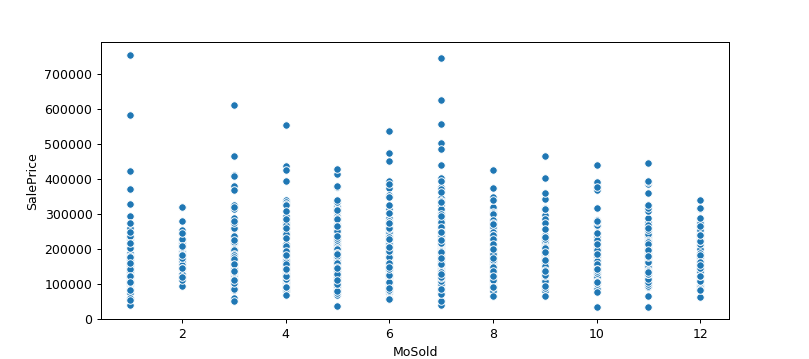

In [74]:
plt.figure(figsize=(9, 4))
ax = sns.scatterplot(x=df_train['MoSold'],y=df_train['SalePrice'])
plt.show()

Here we can see mostly all the month has same amount of sales. So let's drop this feature

In [75]:
df_train=df_train.drop('MoSold',axis=1)

Let's drop this feature in test data too

In [76]:
df_test=df_test.drop('MoSold',axis=1)

### Splitting the target variable from numerical

With the year in which the house, we can't do anything so we calculate the age of the house when it was sold. 

To do this we subtract the year in which it is built from the year in which it is sold

In [77]:
ageofHouse=[]
for i in range(len(df_train)):
    ageofHouse.append(df_train['YrSold'][i]-df_train['YearBuilt'][i])
ageofHouse=pd.DataFrame(ageofHouse)

Lets add this new derived feature to the dataframe

In [78]:
df_train['ageofHouse']=ageofHouse

Lets do the same for test data

In [79]:
test_ageofHouse=[]
for i in range(len(df_test)):
    test_ageofHouse.append(df_test['YrSold'][i]-df_test['YearBuilt'][i])
test_ageofHouse=pd.DataFrame(test_ageofHouse)

In [80]:
df_test['ageofHouse']=test_ageofHouse

The year in which the house sold also has great significance, because if the house is sold in recent past then the price would be high for sure.

So lets create another derived variable. Here we subtract the sold year from the maximum of sold year.

For train data

In [81]:
soldYrComparison=[]
for i in range(len(df_train)):
    soldYrComparison.append(df_train['YrSold'].max()-df_train['YrSold'][i])
soldYrComparison=pd.DataFrame(soldYrComparison)

In [82]:
df_train['soldYrComparison']=soldYrComparison

Lets do the same for test data

In [83]:
test_soldYrComparison=[]
for i in range(len(df_test)):
    test_soldYrComparison.append(df_test['YrSold'].max()-df_test['YrSold'][i])
test_soldYrComparison=pd.DataFrame(test_soldYrComparison)

In [84]:
df_test['soldYrComparison']=test_soldYrComparison

Now we have formed a new derived variable from sold year and built year, so the original built year and sold year features are not needed. Lets delete it from train and test data

In [85]:
df_train=df_train.drop(['YearBuilt','YrSold'],axis=1)

In [86]:
df_test=df_test.drop(['YearBuilt','YrSold'],axis=1)

We also no need the Id feature, because it is just like index

In [87]:
df_train=df_train.drop(['Id'],axis=1)
df_test=df_test.drop(['Id'],axis=1)

Now we have to delete the same features(which we have delete from dataframe) from the list  numerical_feature(both train and test)

In [88]:
train_numerical_feature1.remove('Id')
train_numerical_feature1.remove('MoSold')
train_numerical_feature1.remove('YearBuilt')
train_categorical_feature1.remove('YrSold')

In [89]:
try:
    test_numerical_feature1.remove('Id')
    test_numerical_feature1.remove('MoSold')
    test_numerical_feature1.remove('YearBuilt')
    test_categorical_feature1.remove('YrSold')
except:
    pass

We have the add the feature names of new derived features which we added to the dataframe 

In [90]:
train_numerical_feature1+=['ageofHouse','soldYrComparison']
test_numerical_feature1+=['ageofHouse','soldYrComparison']

We also remove the YearRemodAdd feature

In [91]:
df_train=df_train.drop('YearRemodAdd',axis=1)
df_test=df_test.drop('YearRemodAdd',axis=1)

In [92]:
try:
    train_numerical_feature1.remove('YearRemodAdd')
    test_numerical_feature1.remove('YearRemodAdd')
except:
    pass

In [93]:
# train_cateorical_feature1.remove('YearRemodAdd')
# test_cateorical_feature1.remove('YearRemodAdd')

Finally we check whether the feature in dataframe and the names f feature in the list(eg:train_numerical_feature1) are same

In [94]:
a=list(df_train.columns)
b=list(train_numerical_feature1)+list(train_categorical_feature1)
list1=[x for x in a if x not in b]
print(list1)

['SalePrice']


In [95]:
a=list(df_test.columns)
b=list(test_numerical_feature1)+list(test_categorical_feature1)
list1=[x for x in a if x not in b]
print(list1)

[]


## Feature selection

First for numerical type features

For this we have to split our numerical data into x(like predictor) and y(target) 

In [96]:
df_xnumtrain=df_train[train_numerical_feature1]
df_ytrain=df_train['SalePrice']

Lets select 15 best features in numerical type features

In [97]:
fs = SelectKBest(score_func=f_regression, k=15)

In [98]:
Xnumerical_selected = fs.fit_transform(df_xnumtrain,df_ytrain )
train_xnumerical_withsel=pd.DataFrame(Xnumerical_selected)

In [99]:
train_xnumerical_withsel.shape

(1460, 15)

Here we can see that 'train_xnumerical_withsel' has only 15 best feature

Now we get the column names of the selected numerical features

In [100]:
filter1 = fs.get_support()

In [101]:
train_selectedlist_numerical=array(train_numerical_feature1)[filter1]
print(train_selectedlist_numerical)

['LotFrontage' 'LotArea' 'OverallQual' 'MasVnrArea' 'BsmtFinSF1'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'GrLivArea'
 'TotRmsAbvGrd' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'ageofHouse']


Above list shows the selected numerical feature names

Since we have the selected features name, we dont want to repeat the same procedure again for test numerical data

### Selection for categorical

In [102]:
try:
    test_categorical_feature1.remove('MiscFeature')
    test_categorical_feature1.remove('Fence')
    test_categorical_feature1.remove('FireplaceQu')
    test_categorical_feature1.remove('Alley')
    test_categorical_feature1.remove('PoolQC')
    test_categorical_feature1.remove('YrSold')
except:
    pass

To avoid redundancy in the feature list we use set

In [103]:
test_categorical_feature1=set(test_categorical_feature1)
train_categorical_feature1=set(train_categorical_feature1)
test_numerical_feature1=set(test_numerical_feature1)
train_numerical_feature1=set(train_numerical_feature1)

Encoding using one hot encoding technique both for train and test catgorical data

In [104]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(df_train[train_categorical_feature1])

OneHotEncoder(handle_unknown='ignore')

In [105]:
train_cat_encoded=enc.transform(df_train[train_categorical_feature1]).toarray()

In [106]:
train_cat_encoded=pd.DataFrame(train_cat_encoded)

In [107]:
try:
    test_categorical_feature1.remove('YrSold')
except:
    pass

In [108]:
test_cat_encoded=enc.transform(df_test[test_categorical_feature1]).toarray()

In [109]:
test_cat_encoded=pd.DataFrame(test_cat_encoded)

Use same feature selection method and get 20 useful variables

In [110]:
fs1 = SelectKBest(score_func=f_regression, k=20)

In [111]:
df_xcat_train=train_cat_encoded
df_ytrain=df_train['SalePrice']

In [112]:
train_Xcategorical_selected = fs1.fit_transform(df_xcat_train,df_ytrain )

In [113]:
train_xcategorical_withsel=pd.DataFrame(train_Xcategorical_selected)

In [114]:
train_xcategorical_withsel.shape

(1460, 20)

Here we can seen just 200 important features have been selected

In [115]:
filter2 = fs1.get_support()

In [116]:
train_selectedlist_categorical=array(train_cat_encoded.columns)[filter2]
print(train_selectedlist_categorical)

[ 18  21  31  34  51  62 108 110 111 130 142 173 185 186 210 212 237 240
 242 243]


These are the 20 selected feature columns in all encoded categories..

## At last we are ready for Modeling

In [117]:
x_train_final=pd.concat([df_train[train_selectedlist_numerical],train_cat_encoded[train_selectedlist_categorical]],axis=1)

In [118]:
x_train_final

LotFrontage  LotArea  OverallQual  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
0            65.0     8450            7       196.0         706        150   
1            80.0     9600            6         0.0         978        284   
2            68.0    11250            7       162.0         486        434   
3            60.0     9550            7         0.0         216        540   
4            84.0    14260            8       350.0         655        490   
...           ...      ...          ...         ...         ...        ...   
1455         62.0     7917            6         0.0           0        953   
1456         85.0    13175            6       119.0         790        589   
1457         66.0     9042            7         0.0         275        877   
1458         68.0     9717            5         0.0          49          0   
1459         75.0     9937            5         0.0         830        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  142  173  185  186  \
0             856       856       854       1710  ...  1.0  0.0  0.0  1.0   
1            1262      1262         0       1262  ...  0.0  1.0  0.0  1.0   
2             920       920       866       1786  ...  1.0  0.0  0.0  1.0   
3             756       961       756       1717  ...  0.0  1.0  1.0  0.0   
4            1145      1145      1053       2198  ...  1.0  0.0  0.0  1.0   
...           ...       ...       ...        ...  ...  ...  ...  ...  ...   
1455          953       953       694       1647  ...  1.0  1.0  0.0  1.0   
1456         1542      2073         0       2073  ...  0.0  0.0  0.0  1.0   
1457         1152      1188      1152       2340  ...  0.0  1.0  0.0  1.0   
1458         1078      1078         0       1078  ...  0.0  1.0  1.0  0.0   
1459         1256      1256         0       1256  ...  0.0  1.0  1.0  0.0   

      210  212  237  240  242  243  
0     0.0  0.0  0.0  0.0  1.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  1.0  
2     0.0  0.0  0.0  0.0  1.0  0.0  
3     0.0  1.0  0.0  0.0  0.0  1.0  
4     0.0  1.0  0.0  0.0  1.0  0.0  
...   ...  ...  ...  ...  ...  ...  
1455  0.0  0.0  0.0  0.0  0.0  1.0  
1456  0.0  0.0  0.0  0.0  0.0  1.0  
1457  1.0  0.0  0.0  1.0  0.0  0.0  
1458  1.0  0.0  0.0  0.0  0.0  1.0  
1459  1.0  0.0  0.0  0.0  1.0  0.0  

[1460 rows x 35 columns]

In [119]:
y_train_final=df_train['SalePrice']

We are ready to train the model

In [120]:
lr = LinearRegression()
lr.fit(x_train_final, y_train_final)

LinearRegression()

Preparing test data for prediction

In [121]:
x_test_final=pd.concat([df_test[train_selectedlist_numerical],test_cat_encoded[train_selectedlist_categorical]],axis=1)

In [122]:
x_test_final.shape

(1459, 35)

Prediction

In [123]:
y_pred_final=lr.predict(x_test_final)

In [124]:
y_pred_final.shape

(1459,)

Score is shown below. Kaggle score in this case is calculated with root mean square error.

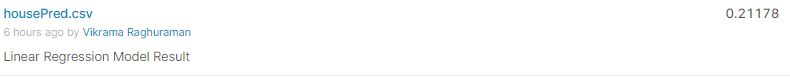

Lets save the predicted values in a csv file

In [125]:
idnums=pd.DataFrame(list(range(1461,1461+1459)))
y_pred_df=pd.DataFrame(y_pred_final)

In [126]:
result=pd.concat([idnums,y_pred_df],axis=1)

In [127]:
result.columns=['Id','SalePrice']

In [128]:
result

Id      SalePrice
0     1461  130030.970544
1     1462  168417.098717
2     1463  172208.807129
3     1464  214342.904650
4     1465  218842.467415
...    ...            ...
1454  2915  109693.475507
1455  2916  102709.183344
1456  2917  158464.195316
1457  2918  135579.844720
1458  2919  224719.499932

[1459 rows x 2 columns]

In [129]:
result.to_csv('C:/Users/vikrama/kaggle csv/housePred.csv',sep=',',index=None)
dff=pd.read_csv('C:/Users/vikrama/kaggle csv/housePred.csv',)
dff

Id      SalePrice
0     1461  130030.970544
1     1462  168417.098717
2     1463  172208.807129
3     1464  214342.904650
4     1465  218842.467415
...    ...            ...
1454  2915  109693.475507
1455  2916  102709.183344
1456  2917  158464.195316
1457  2918  135579.844720
1458  2919  224719.499932

[1459 rows x 2 columns]

Let us compare the prediction of linear regression with Random forest regressor

In [130]:
rfr = RandomForestRegressor(n_estimators=100, random_state=50)
rfr.fit(x_train_final, y_train_final)

RandomForestRegressor(random_state=50)

In [131]:
y_pred_final_rfr=rfr.predict(x_test_final)
y_pred_final_rfr=pd.DataFrame(y_pred_final_rfr)

The score of random forest regressor is shown below. The kaggle score in this case is calculated using root mean square error.

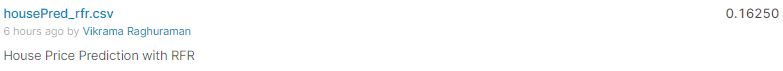

### Here we can see that the random forest regressor model has performed better than the linear regression model

Lets save the predicted values in a csv file

In [132]:
idnums=pd.DataFrame(list(range(1461,1461+1459)))
y_pred_final_rfr_df=pd.DataFrame(y_pred_final_rfr)

In [133]:
result_rfr=pd.concat([idnums,y_pred_final_rfr],axis=1)

In [134]:
result_rfr.columns=['Id','SalePrice']

In [135]:
result_rfr

Id  SalePrice
0     1461  136680.00
1     1462  157284.59
2     1463  186935.40
3     1464  176520.50
4     1465  202343.49
...    ...        ...
1454  2915   78772.86
1455  2916   87271.93
1456  2917  152975.56
1457  2918  115477.50
1458  2919  218720.33

[1459 rows x 2 columns]

Saving the result in the form of csv

In [136]:
result_rfr.to_csv('C:/Users/vikrama/kaggle csv/housePred_rfr.csv',sep=',',index=None)
dff1=pd.read_csv('C:/Users/vikrama/kaggle csv/housePred_rfr.csv',)
dff1

Id  SalePrice
0     1461  136680.00
1     1462  157284.59
2     1463  186935.40
3     1464  176520.50
4     1465  202343.49
...    ...        ...
1454  2915   78772.86
1455  2916   87271.93
1456  2917  152975.56
1457  2918  115477.50
1458  2919  218720.33

[1459 rows x 2 columns]

# THE END